In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100) # Normal distribution
outliers = np.array([120, 130, -10, 110]) # Adding some clear outliers
data = np.concatenate((data, outliers))

In [10]:
# Create a DataFrame
df = pd.DataFrame({'Value': data})


In [12]:
df.head()

,Value
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [13]:
df.describe()

,Value
count,104.000000
mean,50.443783
std,16.116259
min,-10.000000
25%,43.990943
50%,49.061708
75%,55.205906
max,130.000000


In [14]:
print("\n--- Z-score Method ---")
df['Z_score'] = np.abs(stats.zscore(df['Value']))


--- Z-score Method ---


In [ ]:
df['Z_score']

4.960300058031781

In [17]:
z_score_threshold = 3 # Common threshold
outliers_zscore = df[df['Z_score'] > z_score_threshold]
print(f"Outliers using Z-score (threshold > {z_score_threshold}):")
print(outliers_zscore)

Outliers using Z-score (threshold > 3):
     Value   Z_score
100  120.0  4.336804
101  130.0  4.960300
102  -10.0  3.768647
103  110.0  3.713308


In [18]:
print("\n--- IQR Method ---")
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


--- IQR Method ---


In [19]:
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
print(f"Outliers using IQR (Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}):")
print(outliers_iqr)

Outliers using IQR (Lower: 27.17, Upper: 72.03):
          Value   Z_score
74    23.802549  1.661071
100  120.000000  4.336804
101  130.000000  4.960300
102  -10.000000  3.768647
103  110.000000  3.713308


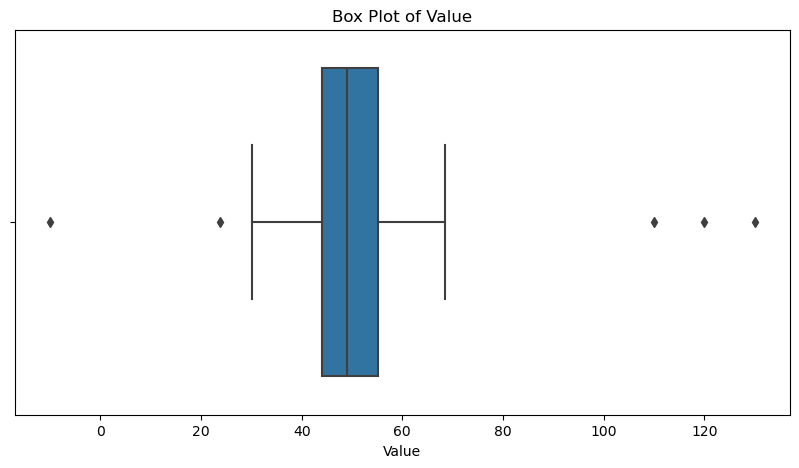

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()